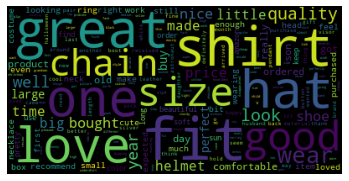

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# reading in data
data = pd.read_csv('review_count.csv')
data_train = data
# removing labels
data = data.iloc[:, 3:]

## wordcloud
wordsForCount = []
for label in set(data.columns):
    wordcount = sum(data[label])
    for i in range(int(wordcount)):
        wordsForCount.append(str(label))

wordsForCount = " ".join(wordsForCount)  # turning list of strings into one string
wordcloud = WordCloud(collocations=False).generate(wordsForCount)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer()
cv.fit(data_train['text'])
# 划分训练集和测试集
x = cv.transform(data_train['text'])
y = data_train['rate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Confusion Matrix:
[[ 32   0   1   1   2]
 [  3  30   0   2   1]
 [  5   3  40   0   1]
 [  4   2   8  74   1]
 [  3   4   9  14 220]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.68      0.89      0.77        36
         2.0       0.77      0.83      0.80        36
         3.0       0.69      0.82      0.75        49
         4.0       0.81      0.83      0.82        89
         5.0       0.98      0.88      0.93       250

    accuracy                           0.86       460
   macro avg       0.79      0.85      0.81       460
weighted avg       0.88      0.86      0.87       460



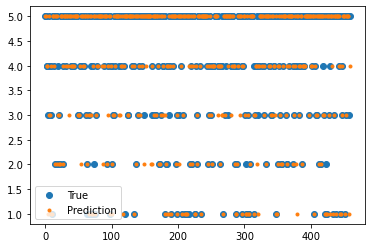

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

cls1 = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5, min_samples_leaf=2)
cls1.fit(x_train, y_train)
y_pred1 = cls1.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred1))
print("Classification Report:")
print(classification_report(y_train, y_pred1))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred1, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 33   1   0   1   1]
 [  5  28   0   1   2]
 [  2   3  41   1   2]
 [  2   1   6  75   5]
 [  2   2   3  14 229]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.92      0.83        36
         2.0       0.80      0.78      0.79        36
         3.0       0.82      0.84      0.83        49
         4.0       0.82      0.84      0.83        89
         5.0       0.96      0.92      0.94       250

    accuracy                           0.88       460
   macro avg       0.83      0.86      0.84       460
weighted avg       0.89      0.88      0.88       460



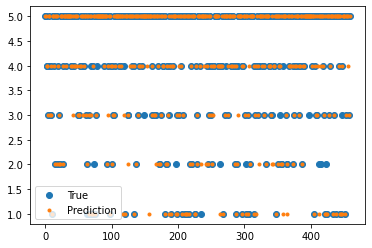

In [65]:
cls2 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5, min_samples_leaf=2)
cls2.fit(x_train, y_train)
y_pred2 = cls2.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred2))
print("Classification Report:")
print(classification_report(y_train, y_pred2))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred2, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 36   0   0   0   0]
 [  0  35   1   0   0]
 [  1   1  47   0   0]
 [  1   3   4  81   0]
 [ 15  11  14  18 192]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.68      1.00      0.81        36
         2.0       0.70      0.97      0.81        36
         3.0       0.71      0.96      0.82        49
         4.0       0.82      0.91      0.86        89
         5.0       1.00      0.77      0.87       250

    accuracy                           0.85       460
   macro avg       0.78      0.92      0.83       460
weighted avg       0.89      0.85      0.85       460



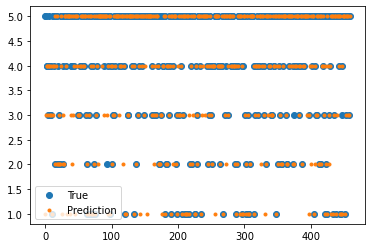

In [66]:
cls3= DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5, min_samples_leaf=2,class_weight='balanced')
cls3.fit(x_train, y_train)
y_pred3 = cls3.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred3))
print("Classification Report:")
print(classification_report(y_train, y_pred3))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred3, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 36   0   0   0   0]
 [  2  33   0   0   1]
 [  0   1  47   1   0]
 [  3   1   6  78   1]
 [  9   6   9  23 203]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.72      1.00      0.84        36
         2.0       0.80      0.92      0.86        36
         3.0       0.76      0.96      0.85        49
         4.0       0.76      0.88      0.82        89
         5.0       0.99      0.81      0.89       250

    accuracy                           0.86       460
   macro avg       0.81      0.91      0.85       460
weighted avg       0.89      0.86      0.87       460



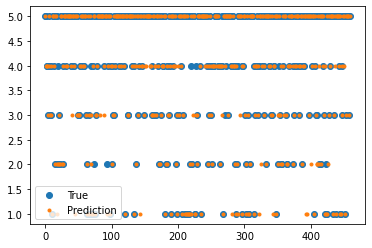

In [67]:
cls4 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5, min_samples_leaf=2,class_weight='balanced')
cls4.fit(x_train, y_train)
y_pred4 = cls4.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred4))
print("Classification Report:")
print(classification_report(y_train, y_pred4))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred4, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

In [68]:
y_pred_all_true = (y_train == y_pred1) & (y_train == y_pred2) & (y_train == y_pred3) & (y_train == y_pred4)
x_train_all_true = x_train[y_pred_all_true]
y_train_all_true = y_train[y_pred_all_true]

Confusion Matrix:
[[ 27   0   2   1   0]
 [  0  23   0   0   1]
 [  1   0  29   0   1]
 [  4   1   1  47   1]
 [  0   2   0   2 132]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.90      0.87        30
         2.0       0.88      0.96      0.92        24
         3.0       0.91      0.94      0.92        31
         4.0       0.94      0.87      0.90        54
         5.0       0.98      0.97      0.97       136

    accuracy                           0.94       275
   macro avg       0.91      0.93      0.92       275
weighted avg       0.94      0.94      0.94       275



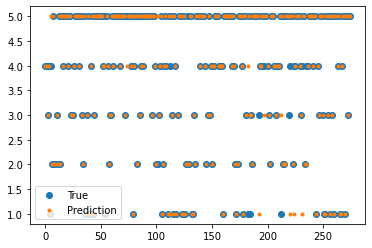

In [69]:
cls_final = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5)
cls_final.fit(x_train_all_true, y_train_all_true)
y_pred_final = cls_final.predict(x_train_all_true)

print("Confusion Matrix:")
print(confusion_matrix(y_train_all_true, y_pred_final))
print("Classification Report:")
print(classification_report(y_train_all_true, y_pred_final))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train_all_true.shape[0])), y_train_all_true, marker='o')
f2 = ax.scatter(list(range(x_train_all_true.shape[0])), y_pred_final, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 0  0  4  1  2]
 [ 1  0  3  1  1]
 [ 3  0  2  1  4]
 [ 3  0  8  5 10]
 [ 6  4  7  7 42]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         6
         3.0       0.08      0.20      0.12        10
         4.0       0.33      0.19      0.24        26
         5.0       0.71      0.64      0.67        66

    accuracy                           0.43       115
   macro avg       0.23      0.21      0.21       115
weighted avg       0.49      0.43      0.45       115



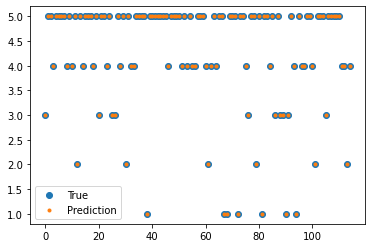

In [70]:
from collections import Counter

y_pred_test = cls_final.predict(x_test)
Counter(y_pred_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_test.shape[0])), y_test, marker='o')
f2 = ax.scatter(list(range(x_test.shape[0])), y_test, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

In [71]:
import pydotplus
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

def draw_model(tree, filename):
    dot_data = export_graphviz(tree,
    out_file = None,
	feature_names = cv.get_feature_names(),
	class_names = str(tree.classes_),
	filled=True,
	rounded = True,
	special_characters = True)
    #graph = pydotplus.graph_from_dot_data(dot_data)
    #Image(graph.create_png())
    #graph.write_png(filename)
    graph = graphviz.Source(dot_data)
    graph.render(filename)

draw_model(cls1, 'cls_e')
draw_model(cls2, 'cls_g')
draw_model(cls3, 'cls_e_bal')
draw_model(cls4, 'cls_g_bal')
draw_model(cls_final, 'cls_final')